# Filtros

Este ejemplo se muestra cómo trabajan los filtros convolucionales

In [1]:
import numpy as np
import torch
import torch.nn.functional as F
from sklearn.datasets import load_sample_image 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 16]

In [2]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [3]:
# Cargamos las imágenes de ejemplo
china = load_sample_image("china.jpg")
chinagray = rgb2gray(china) / 15
china  = china / 255
china = np.transpose(china, (2,0,1))
flower = load_sample_image("flower.jpg")
flowergray = rgb2gray(flower) / 15
flower  = flower / 255
flower = np.transpose(flower, (2,0,1))
images = np.array([china, flower])
batch_size, channels, height, width,  = images.shape


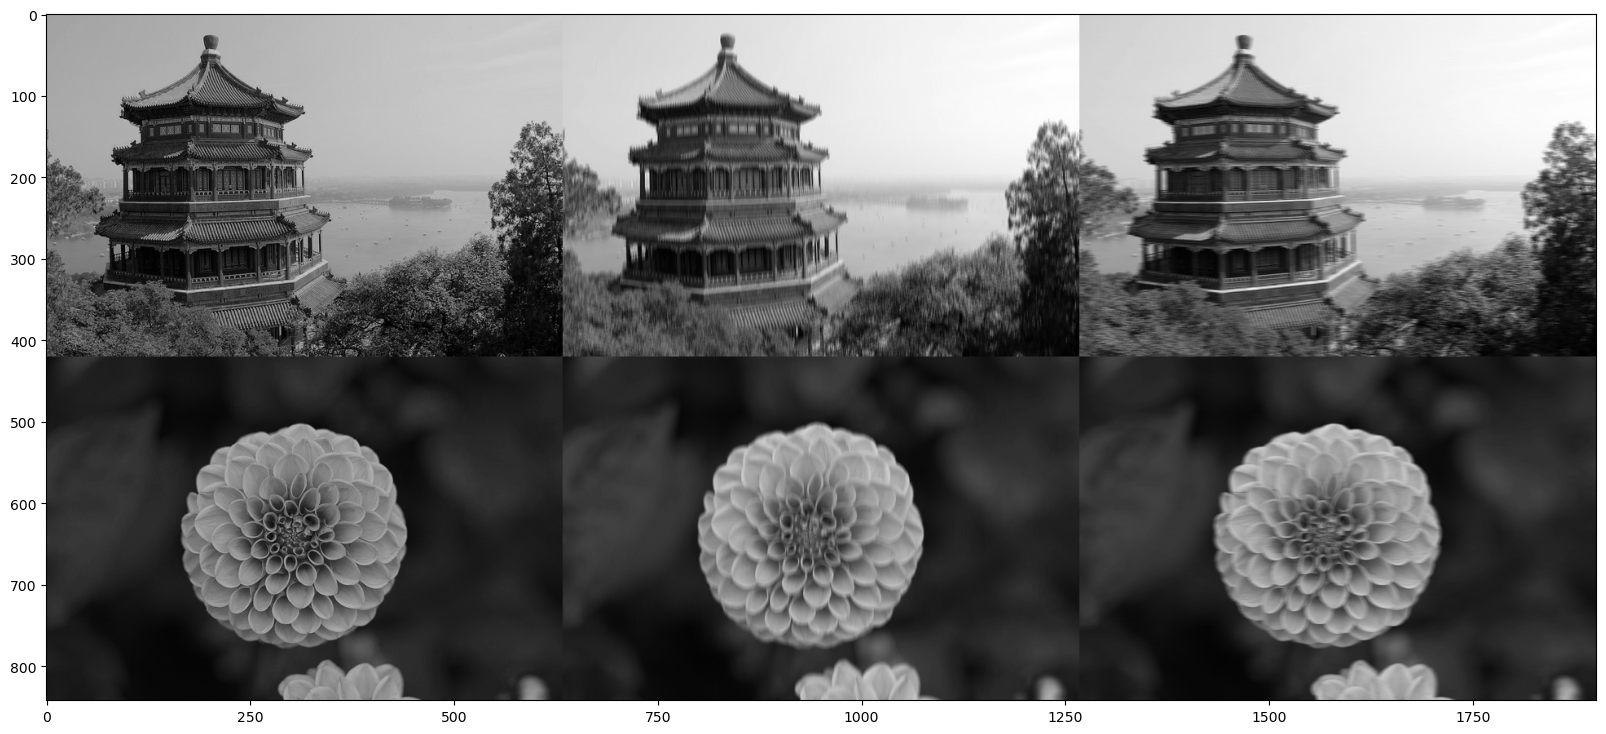

In [4]:
# Creamos dos filtros a mano
filters = np.zeros(shape=(2, channels, 7, 7), dtype=np.float32)
filters[0, :, :, 3] = 1  # linea vertical
filters[1, :, 3, :] = 1  # linea horizontal 

# Aplicamos la convolución
outputs = F.conv2d(torch.Tensor(images), torch.Tensor(filters), padding=0)

final = np.vstack((
    np.hstack((chinagray[3:-3,3:-3], outputs[0, 0, :, :], outputs[0, 1, :, :])),
    np.hstack((flowergray[3:-3,3:-3], outputs[1, 0, :, :], outputs[1, 1, :, :]))
))

plt.imshow(final, cmap="gray")
plt.show()